In [4]:
#! pip install googlemaps gmaps

In [37]:
import warnings
import datetime
import warnings
import json
import pandas as pd
import time
import csv
import xlrd
import glob
import os
from datetime import datetime

# Visualize
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Google maps
import gmaps

import googlemaps
import json
import os
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
sns.set(style='darkgrid')

In [38]:
pd_coffee_survay_I2 = pd.read_excel("data/all_together_2nd.xlsx", ignore_index=True, skiprows=1)
print(pd_coffee_survay_I2.shape)
pd_coffee_survay_I2.head(3)

(71, 25)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Taste of the coffee,Price,Speed of the service,"Eating option (even if you didn't order at this shop, how well does it look to you?)",...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,hai.nguyen@news.com.au,Latte,7,8,9,5,...,0,AU,NSW,NaN,NaN,NaN,NaN,NaN,True,NaN
1,NaN,NaN,NaN,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,worakorn.chaichakan@news.com.au,Cappuccino,7,8,9,7,...,0,AU,NSW,NaN,NaN,NaN,NaN,NaN,True,NaN
2,NaN,NaN,NaN,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,venkatram.sampathkumar@news.com.au,Flat white,8,6,6,5,...,0,AU,NSW,NaN,NaN,NaN,NaN,NaN,True,NaN


In [39]:
# Read all the input columns 
pd_coffee_survay_I2.columns = ['Image1', 'Image2', 'Image3', 'Address', 'News_email', 'Coffee_ordered',
       'Taste_Quantity', 'Price', 'Service_Speed',
       'Eating_option', 'Loyalty_cards', 'hospitality', 'Place_4_Hangout', 'Comments',
       'Date', 'Time_Taken', 'Country_Code', 'Region_Code', 'First_Name',
       'Last_Name', 'Email', 'Custom_Field', 'Participant_code',
       'Completed', 'External_ID']

coffee_mapping = {
      "Very Bad": -2,
      "Bad":-1,
      "Neutral": 0,
      "Good": 1, 
      "Very Good": 2
      }

# Read selected input columns
pd_coffee_survay_I2_sel = pd_coffee_survay_I2[['Address', 'News_email', 'Coffee_ordered',
       'Taste_Quantity', 'Price', 'Service_Speed','Eating_option', 'Loyalty_cards', 'hospitality', 'Place_4_Hangout', 'Comments']]
pd_coffee_survay_I2_sel['Address']=pd_coffee_survay_I2_sel['Address']

pd_coffee_survay_I2_sel_na = pd_coffee_survay_I2_sel.dropna(thresh=1)
pd_coffee_survay_I2_sel.News_email.notnull()

print(pd_coffee_survay_I2_sel.shape) 
pd_coffee_survay_I2_sel.head()


(71, 11)


,Address,News_email,Coffee_ordered,Taste_Quantity,Price,Service_Speed,Eating_option,Loyalty_cards,hospitality,Place_4_Hangout,Comments
0,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,hai.nguyen@news.com.au,Latte,7,8,9,5,9,10,8,NaN
1,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,worakorn.chaichakan@news.com.au,Cappuccino,7,8,9,7,8,7,6,NaN
2,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,venkatram.sampathkumar@news.com.au,Flat white,8,6,6,5,5,6,6,NaN
3,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,mannix.young@news.com.au,Cappuccino,7,7,8,5,7,8,8,NaN
4,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,gao.jiang@gmail.com,"Long black, Short black and Macchiato",8,8,9,8,8,10,10,NaN


## Data Validation

In [40]:
pd_coffee_survay_I2_sel.head(100)

,Address,News_email,Coffee_ordered,Taste_Quantity,Price,Service_Speed,Eating_option,Loyalty_cards,hospitality,Place_4_Hangout,Comments
0,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,hai.nguyen@news.com.au,Latte,7,8,9,5,9,10,8,NaN
1,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,worakorn.chaichakan@news.com.au,Cappuccino,7,8,9,7,8,7,6,NaN
2,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,venkatram.sampathkumar@news.com.au,Flat white,8,6,6,5,5,6,6,NaN
3,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,mannix.young@news.com.au,Cappuccino,7,7,8,5,7,8,8,NaN
4,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,gao.jiang@gmail.com,"Long black, Short black and Macchiato",8,8,9,8,8,10,10,NaN
5,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,ali.rizvi@news.com.au,Latte,8,8,7,5,1,8,6,NaN
6,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,georgy.abraham@news.com.au,Flat white,3,5,5,6,3,7,6,NaN
7,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,george.serdaris@news.com.au,Cappuccino,8,8,8,8,8,8,8,NaN
8,Lion corner Cafe|69 Cooper St Surry Hills NSW ...,sambaran.roy@news.com.au,Cappuccino,8,9,9,9,8,9,8,NaN
9,"The Reformatory Caffeine Lab|17-51 Foveaux St,...",hai.nguyen@news.com.au,Latte,7,6,9,7,9,8,4,NaN


In [42]:
a = pd_coffee_survay_I2_sel[['Coffee_ordered','Address','News_email']].groupby(['Address','News_email']).agg(['count']).reset_index()
a.columns = ['Address', 'News_email', 'Counts']
#a.columns
a[(a.Counts!=1)]


,Address,News_email,Counts


In [52]:
pd_coffee_survay_I2_sel.columns

Index(['Address', 'News_email', 'Coffee_ordered', 'Taste_Quantity', 'Price',
       'Service_Speed', 'Eating_option', 'Loyalty_cards', 'hospitality',
       'Place_4_Hangout', 'Comments'],
      dtype='object')

In [77]:
df_rating = pd_coffee_survay_I2_sel[[ 'Address','Taste_Quantity', 'Price','Service_Speed', 'Eating_option', 'Loyalty_cards', 'hospitality','Place_4_Hangout']].groupby(['Address']).agg(['mean'])
df_rating.columns = [ 'Taste_Quantity', 'Price','Service_Speed', 'Eating_option', 'Loyalty_cards', 'hospitality','Place_4_Hangout']
#df_rating.sort_values("Price")
df_plot = df_rating.reset_index()
df_plot["Score"] = df_plot.sum(axis=1)
df_plot.sort_values("Score")['Address']

0    Cafe And Cucina|24 Cooper St, Surry Hills NSW ...
8    Presse Cafe|280 Elizabeth St Surry Hills NSW 2...
5    Orto Trading Co.|38 Waterloo St, Surry Hills N...
9    The Reformatory Caffeine Lab|17-51 Foveaux St,...
4     News corp Coffee|2 Holt St Surry Hills NSW 2010​
3    Lion corner Cafe|69 Cooper St Surry Hills NSW ...
1          Citta Cafe|44 Holt St Surry Hills NSW 2010​
2    Di Bella Coffee Roasting Warehouse|50 Holt St,...
6    Ouroboros Wholefoods Cafe | 118 Devonshire Str...
7    Point Blank | 1/47-53 Cooper St, Surry Hills N...
Name: Address, dtype: object

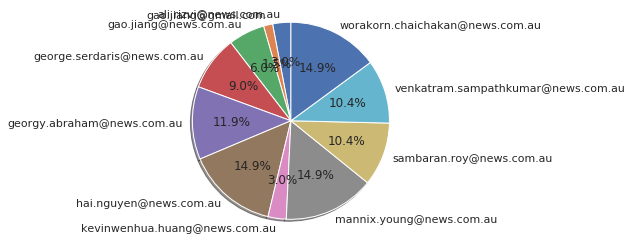

In [44]:
my_data = pd_coffee_survay_I2_sel[['Address','News_email']].groupby(['News_email']).agg(['count'])
my_data = my_data.reset_index()
my_data.columns = ['News_email','Counts']
#my_data['Coffee_ordered']
#my_data['Counts']
fig1, ax1 = plt.subplots()
ax1.pie(my_data['Counts'], labels=my_data['News_email'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

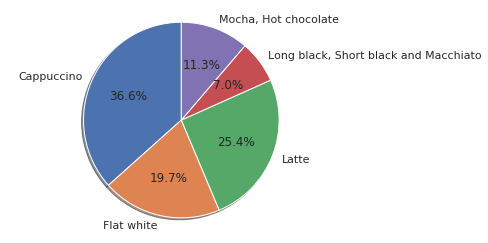

In [45]:
my_data = pd_coffee_survay_I2_sel[['Address','Coffee_ordered']].groupby(['Coffee_ordered']).agg(['count'])
my_data = my_data.reset_index()
my_data.columns = ['Coffee_ordered','Counts']
#my_data['Coffee_ordered']
#my_data['Counts']
fig1, ax1 = plt.subplots()
ax1.pie(my_data['Counts'], labels=my_data['Coffee_ordered'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [46]:
pd_coffee_survay_I2_sel.columns

Index(['Address', 'News_email', 'Coffee_ordered', 'Taste_Quantity', 'Price',
       'Service_Speed', 'Eating_option', 'Loyalty_cards', 'hospitality',
       'Place_4_Hangout', 'Comments'],
      dtype='object')

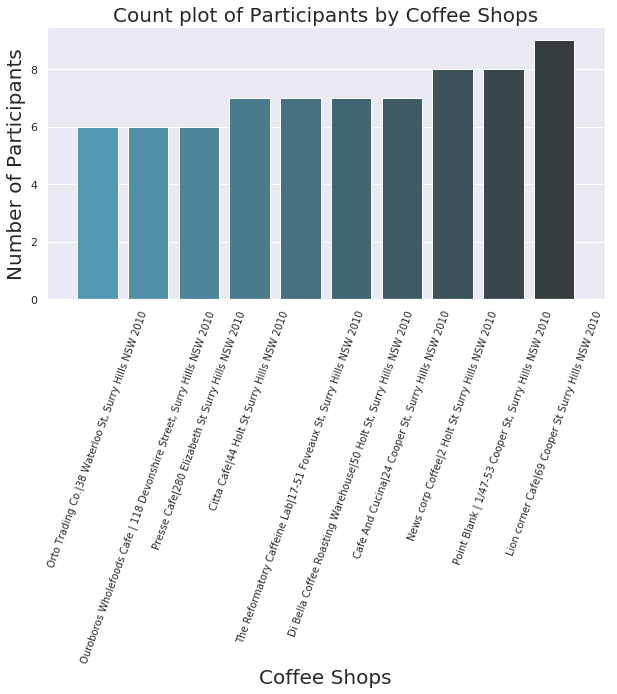

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='Address', \
              data=pd_coffee_survay_I2_sel, \
              order=pd_coffee_survay_I2_sel['Address'].value_counts().index, 
              palette=sns.color_palette("GnBu_d", 20))

plt.title("Count plot of Participants by Coffee Shops", fontsize=20)
plt.xlabel('Coffee Shops', fontsize=20)
plt.ylabel('Number of Participants', fontsize=20)
# Set the length of the bar chart
plt.xlim(len(pd_coffee_survay_I2_sel[['Address']].groupby(['Address']).count()),-1)
plt.xticks(rotation=70, fontsize=10)
plt.show()

In [72]:
df_plot.columns

Index(['Address', 'Taste_Quantity', 'Price', 'Service_Speed', 'Eating_option',
       'Loyalty_cards', 'hospitality', 'Place_4_Hangout', 'Score'],
      dtype='object')

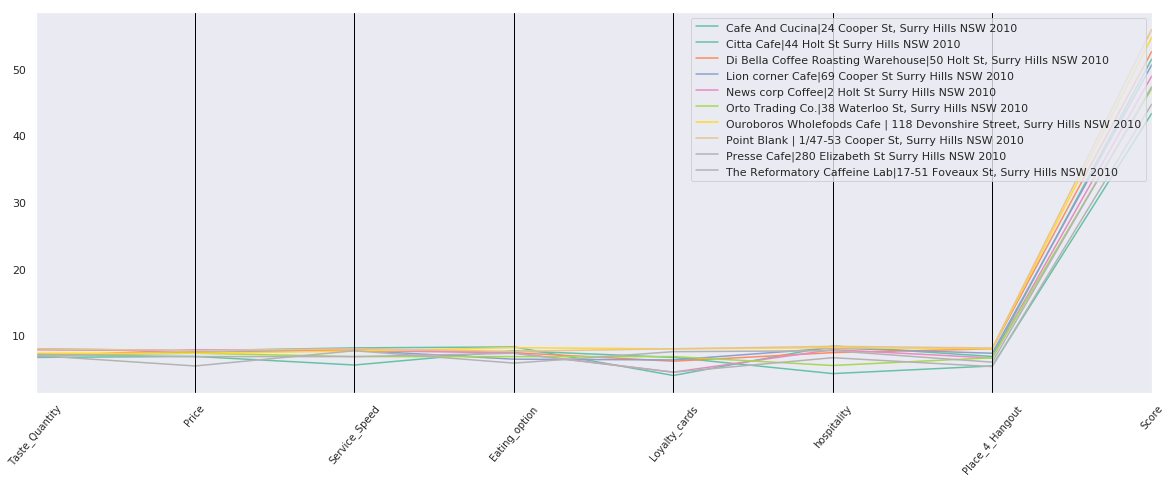

In [73]:
from pandas.tools.plotting import parallel_coordinates

plt.figure(figsize=(20,7))
parallel_coordinates(df_plot[['Address', 'Taste_Quantity', 'Price', 'Service_Speed', 'Eating_option',
       'Loyalty_cards', 'hospitality', 'Place_4_Hangout', 'Score']],"Address",colormap=plt.get_cmap("Set2"))
plt.xticks(rotation=50, fontsize=10)
plt.show()

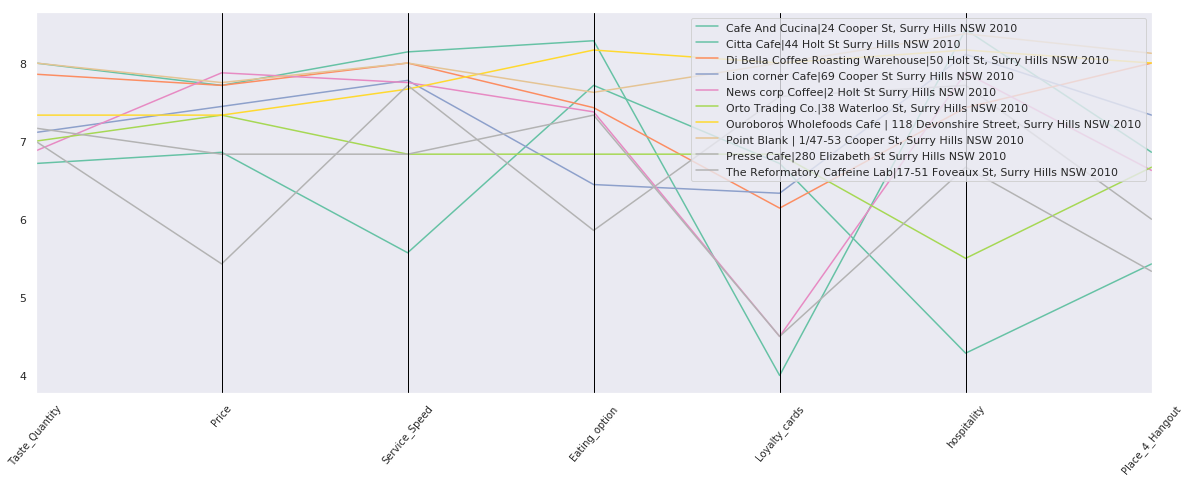

In [74]:
plt.figure(figsize=(20,7))
parallel_coordinates(df_plot[['Address', 'Taste_Quantity', 'Price', 'Service_Speed', 'Eating_option',
       'Loyalty_cards', 'hospitality', 'Place_4_Hangout']],"Address",colormap=plt.get_cmap("Set2"))
plt.xticks(rotation=50, fontsize=10)
plt.show()

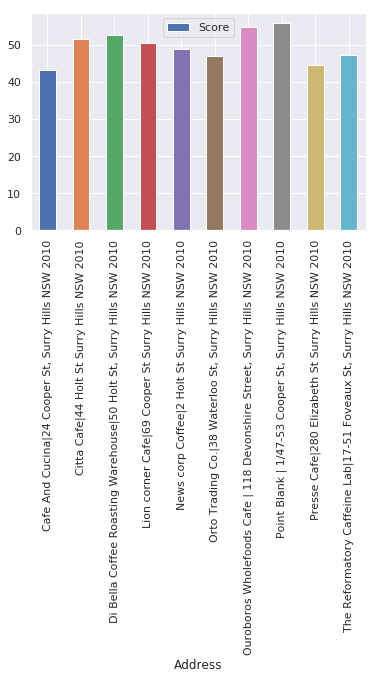

In [78]:
df_plot.plot.bar(x='Address', y='Score')

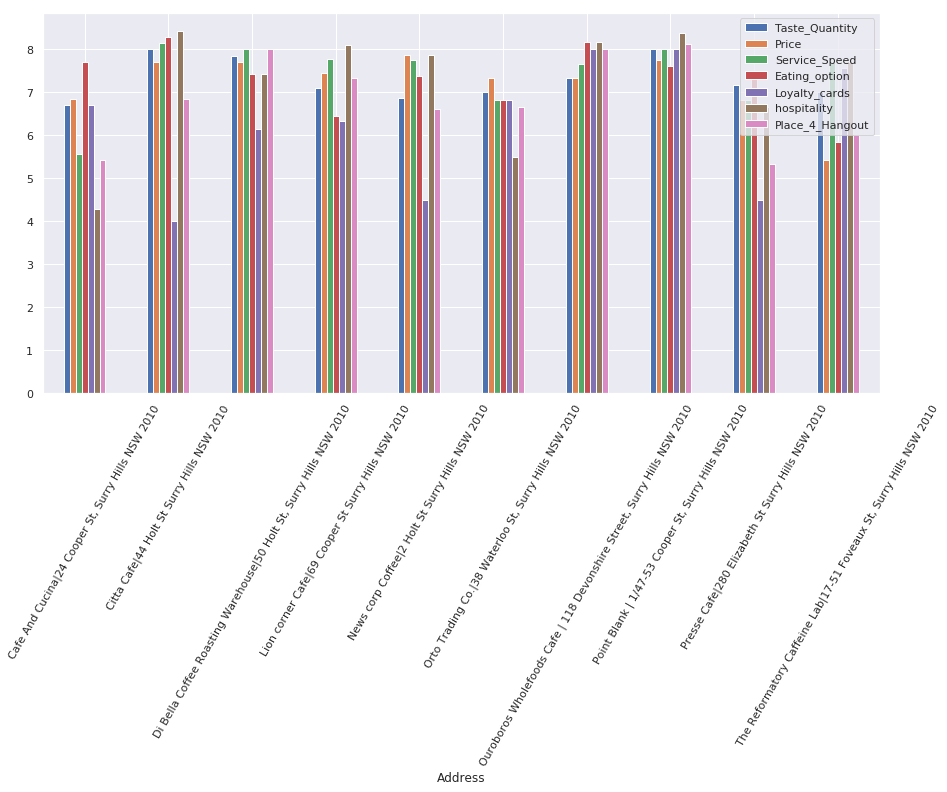

In [81]:
df_plot.plot.bar(x='Address',
                 y=[ 'Taste_Quantity', 'Price', 'Service_Speed', 'Eating_option',
       'Loyalty_cards', 'hospitality', 'Place_4_Hangout'],
                 figsize=(15,7), rot=60)

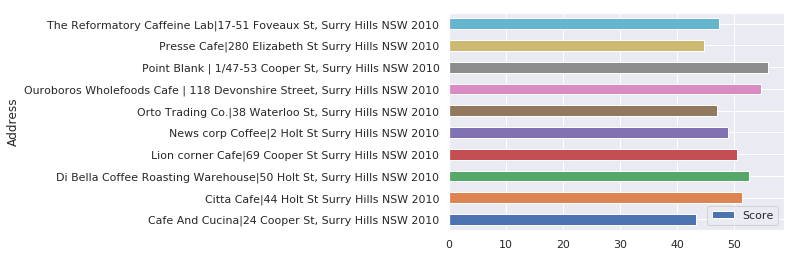

In [82]:
df_plot.plot.barh(x='Address',y='Score')